# ROC

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

## Iris datasets

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
import numpy
ypred = clf.predict(X_test)
yprob = clf.predict_proba(X_test)
score = numpy.array(list(yprob[i,ypred[i]] for i in range(len(ypred))))

In [7]:
data = numpy.zeros((len(ypred), 2))
data[:,0] = score.ravel()
data[ypred==y_test,1] = 1
data[:5]

array([[ 0.71824884,  1.        ],
       [ 0.77715575,  1.        ],
       [ 0.40025481,  1.        ],
       [ 0.45427374,  1.        ],
       [ 0.48433457,  0.        ]])

## ROC

In [8]:
from mlstatpy.ml.roc import ROC

In [9]:
roc = ROC(data)

In [10]:
roc

Overall precision: 0.58 - AUC=0.763158
--------------
      score  label  weight
0  0.374570    0.0     1.0
1  0.400255    1.0     1.0
2  0.412958    1.0     1.0
3  0.454274    1.0     1.0
4  0.454616    0.0     1.0
--------------
       score  label  weight
45  0.824627    1.0     1.0
46  0.860699    1.0     1.0
47  0.868678    1.0     1.0
48  0.873772    1.0     1.0
49  0.918698    1.0     1.0
--------------
    Error Rate  Recognition Rate
0     0.000000          0.026316
1     0.000000          0.157895
2     0.000000          0.289474
3     0.000000          0.421053
4     0.083333          0.526316
5     0.250000          0.605263
6     0.416667          0.684211
7     0.500000          0.789474
8     0.583333          0.894737
9     0.916667          0.921053
10    1.000000          1.000000
--------------
    recall  precision
0     0.02   1.000000
1     0.12   1.000000
2     0.22   1.000000
3     0.32   1.000000
4     0.42   0.952381
5     0.52   0.884615
6     0.62   0.838710

In [11]:
roc.auc()

0.76315789473684215

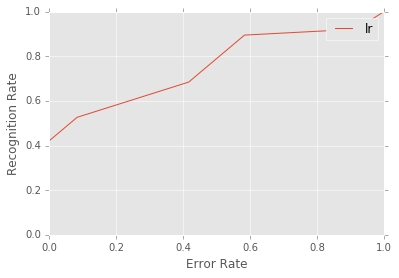

In [12]:
roc.plot(nb=10,label="lr")

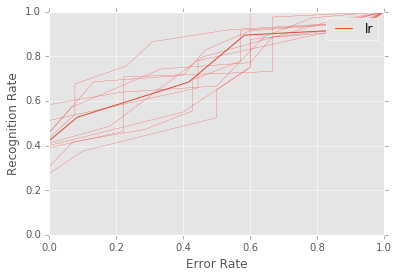

In [13]:
roc.plot(nb=10, label="lr", bootstrap=10)